Importing Pandas

In [59]:
# !pip install matplotlib

# !pip install seaborn

import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns


Load Dataset

In [60]:
file_path = './data/COVID-19_Case_Surveillance_Public_Use_Data.csv'
housing_df = pd.read_csv(file_path,low_memory=False)
housing_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


Summary dari dataset

In [61]:
housing_df.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


In [62]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


dimensi dataset

In [63]:
housing_df.shape

(8405079, 11)

daftar nama dan kolom dataset

In [64]:
housing_df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

data cleaning

In [65]:
housing_df = housing_df.dropna()

In [66]:
housing_df.shape

(1386645, 11)

In [67]:
housing_df.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645,1386645
unique,313,302,338,2,5,10,9,4,4,4,4
top,2020/11/17,2020/11/09,2020/11/09,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,No,No,No
freq,38682,21470,15941,1359068,732481,282718,624505,1033663,550623,911684,478367


Visualisasi Data

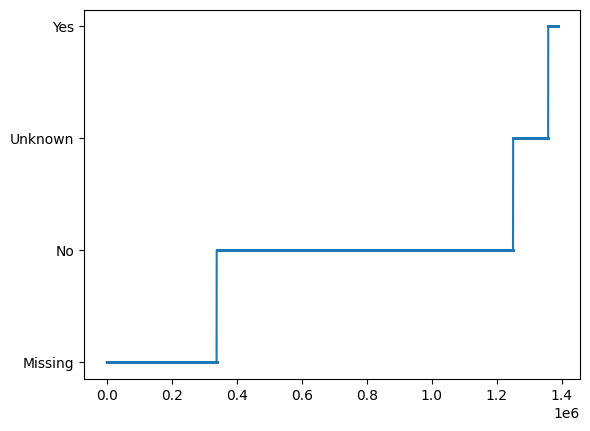

In [68]:
fig, ax = plt.subplots()
ax.plot(np.sort(housing_df['death_yn']), marker='o', markersize=1)

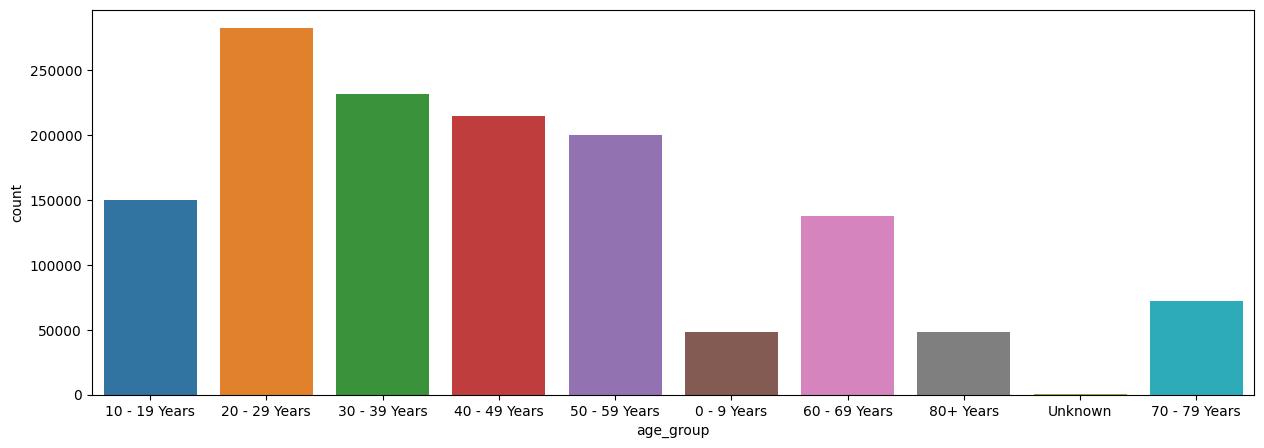

In [69]:
plt.figure(figsize = (15,5))
sns.countplot(x='age_group', data=housing_df)
plt.show()

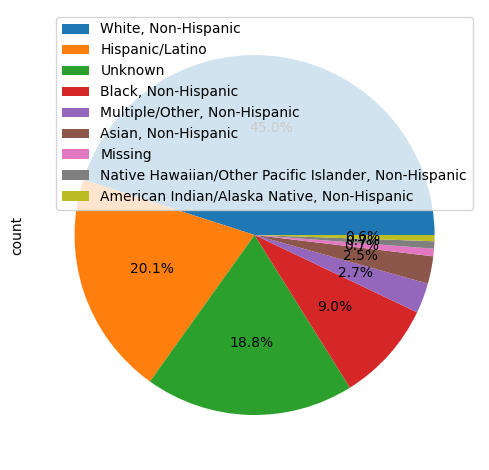

In [70]:
housing_df['Race and ethnicity (combined)'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

One Hot Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex', 'age_group', 
                     'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'medcond_yn', 'death_yn']

clean_rows = housing_df.copy()

for column in columns_to_encode:
    clean_rows[column] = le.fit_transform(clean_rows[column])


memilih target pediksi

In [72]:
features = ['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex', 'age_group', 
                     'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'medcond_yn', 'death_yn']
X = clean_rows[features]
X

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,medcond_yn,death_yn
1,307,279,314,0,1,1,2,1,1,1,1
2,312,279,313,0,1,1,2,1,1,1,1
4,306,279,314,0,1,1,2,1,1,3,1
5,310,279,312,0,1,1,2,0,0,0,0
11,302,279,313,0,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7494726,305,300,316,0,0,2,8,2,0,0,0
7494727,290,300,301,0,1,2,8,2,0,0,0
7494728,258,300,269,0,1,2,8,1,0,0,0
7494729,250,300,261,0,1,2,2,1,0,0,0


In [73]:
y = clean_rows['death_yn']
y

1          1
2          1
4          1
5          0
11         1
          ..
7494726    0
7494727    0
7494728    0
7494729    0
7494730    1
Name: death_yn, Length: 1386645, dtype: int32

In [74]:
from sklearn.tree import DecisionTreeRegressor

Konfigurasi Model

In [75]:
housing_model = DecisionTreeRegressor(random_state=1)

Training Model

In [76]:
housing_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Melakukan Prediksi

In [77]:
housing_model.predict(X.head())

array([1., 1., 1., 0., 1.])

In [78]:
X.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,medcond_yn,death_yn
1,307,279,314,0,1,1,2,1,1,1,1
2,312,279,313,0,1,1,2,1,1,1,1
4,306,279,314,0,1,1,2,1,1,3,1
5,310,279,312,0,1,1,2,0,0,0,0
11,302,279,313,0,1,1,2,1,1,1,1


In [79]:
y.head()

1     1
2     1
4     1
5     0
11    1
Name: death_yn, dtype: int32

In [80]:
import numpy as np
np.random.seed(0)

for _ in range(10):
    print(np.random.randint(10))

5
0
3
3
7
9
3
5
2
4


Melakukan validasi dan evaluasi terhadap model

In [81]:
from sklearn.metrics import mean_absolute_error

In [82]:
y_hat = housing_model.predict(X)
mean_absolute_error(y, y_hat)

0.0

Training dan Testing dataset

In [83]:
from sklearn.model_selection import train_test_split

Membagi daset menjadi dua bagian

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

Konfigurasi dan training model

In [85]:
housing_model = DecisionTreeRegressor(random_state=1)
housing_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Evaluasi Model

In [86]:
y_hat = housing_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

0.0

In [87]:
accuracy = housing_model.score(X_train, y_train)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [89]:
def get_accuracy(death_yn, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [90]:
for death_yn in ["No", "No", "Yes", "Yes"]:
    accuracy = get_accuracy(death_yn, X_train, X_test, y_train, y_test)
    print(f"Max Death yn: {death_yn} \t Accuracy: {accuracy}")

Max Death yn: No 	 Accuracy: 1.0
Max Death yn: No 	 Accuracy: 1.0
Max Death yn: Yes 	 Accuracy: 1.0
Max Death yn: Yes 	 Accuracy: 1.0


Splitting Data

In [91]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [92]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1098222, 11)
Number transactions y_train dataset:  (1098222,)
Number transactions X_test dataset:  (13867, 11)
Number transactions y_test dataset:  (13867,)


Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor


In [94]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_hat))}')

Mean Absolute Error: 0


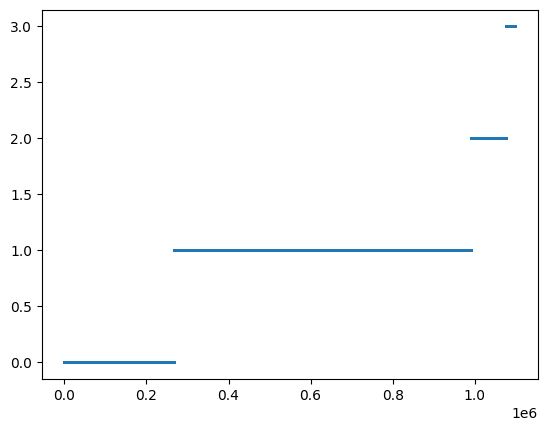

In [95]:
fig, ax = plt.subplots()
_ = ax.plot(np.sort(y_train), marker='o', markersize=1, linestyle='')